<font size ="6" > 1. Exploratory Data Analysis (EDA) </font>


####Days_left is a categorical!!!!


<font size ="5" > Import Data and Packages </font>
<li> Removing index column</li>

In [2]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt
import seaborn as sns 

In [1]:
df = pd.read_csv("C:/Users/Redmi/Desktop/IS460-G1-Machine Learning & Applications/IS460-main/IS460-main/data/Clean_Dataset.csv")
df = df.drop('Unnamed: 0', axis=1)

# Display the first few rows of the DataFrame
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


<font size ="5" > Summary Statistics </font>


In [2]:
df.describe(include = "all")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


In [3]:
df.isna().sum()

airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [4]:
df = df.dropna(axis=0)

In [5]:
df.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9], include='all')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
10%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.750000,7.000000,3389.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000


<font size ="6" > 2. Data visualization </font>
<li>Checking whethere there are any outliers</li>
<li>Getting the distribution of numerical data </li>
<li> Checking if there is a relationship between variables </li>

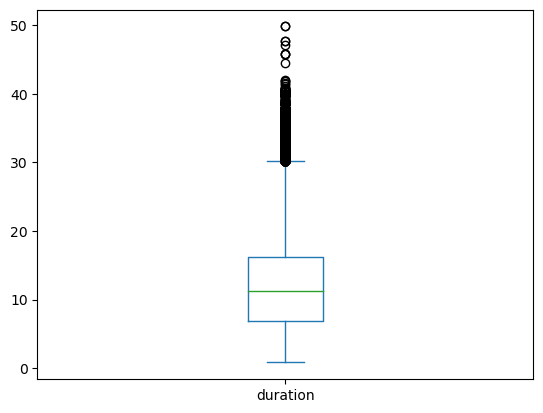

In [6]:
df[['duration']].plot(kind='box')
plt.show()

<Axes: >

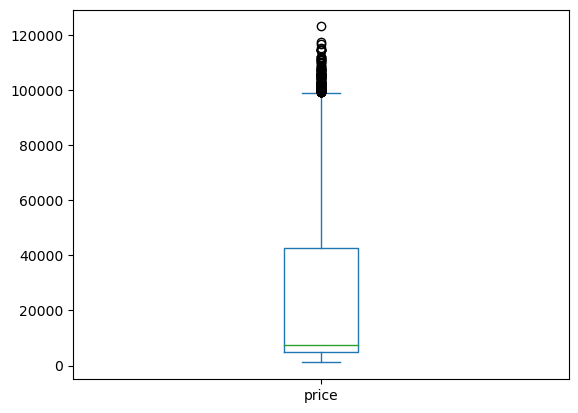

In [7]:
df[['price']].plot(kind='box')

<font size = "3">From the boxplots, there is evidence that there are outliers for the durtaion as well as the price variable. To get a better visualisation of the distribution, we plot histograms. </font>

C:\Users\Redmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


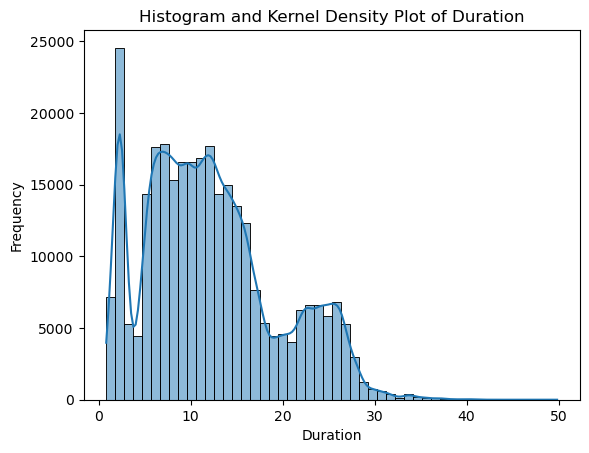

In [8]:
sns.histplot(df['duration'], bins= 50, kde=True)
plt.title('Histogram and Kernel Density Plot of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

C:\Users\Redmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


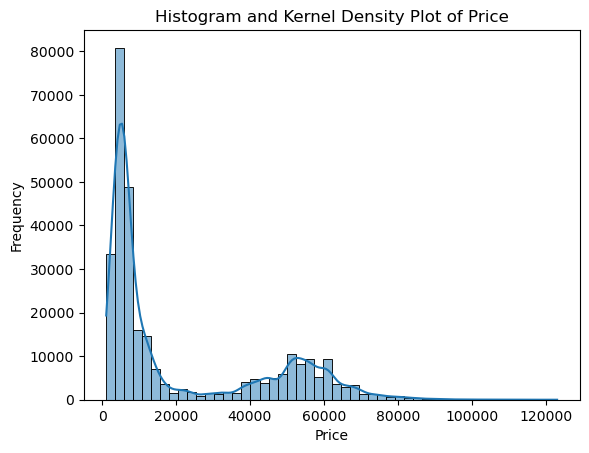

In [9]:
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Histogram and Kernel Density Plot of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

<font size = "3">From the histograms, the distribution of duration  is skewed to the right. The distribution of days left is normally distributed, and the distribution of price is also skewed to the right. </font>

<font size = "3"> Next, scatter plots can be used to visualise any relationship between the numerical variables<font>

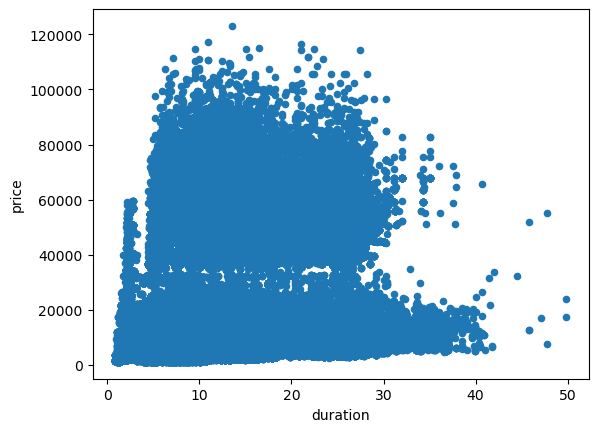

In [10]:
df[['duration', 'price']].plot(kind='scatter', x='duration', y='price')
plt.show()

There seems to be positive linera relationship between the price and duration

<font size = "6"> 3. Data Processing </font>
<font size = "3"><li>Removing all outliers from duration and price variable using standard deviation</li>
<li>Transforming the duration variable using log transformation and transforming the price variable using boxcox transformation </li>
<li>Standardising the scale of all the numerical variable </li></font>

In [11]:
## removing outliers 
def three_sd_range(series):
    mean = series.mean()
    sd = series.std()
    low = mean - 3*sd
    high = mean + 3*sd

    return (low, high)

for col_name in ['duration', 'price']:
    lower, upper = three_sd_range(df[col_name])
    has_outlier = (df[col_name].min() < lower) or (df[col_name].max() > upper)
    print(col_name + ' has outliers: ' + str(has_outlier))

    if has_outlier:
        # Remove outliers
        curr_length = df[col_name].count()
        df = df[ (df[col_name]>=lower) & (df[col_name]<=upper)]
        new_length = df[col_name].count()
        row_removed = curr_length - new_length
        print(str(row_removed) + ' row will be removed from ')

    print()



duration has outliers: True
722 row will be removed from 

price has outliers: True
595 row will be removed from 



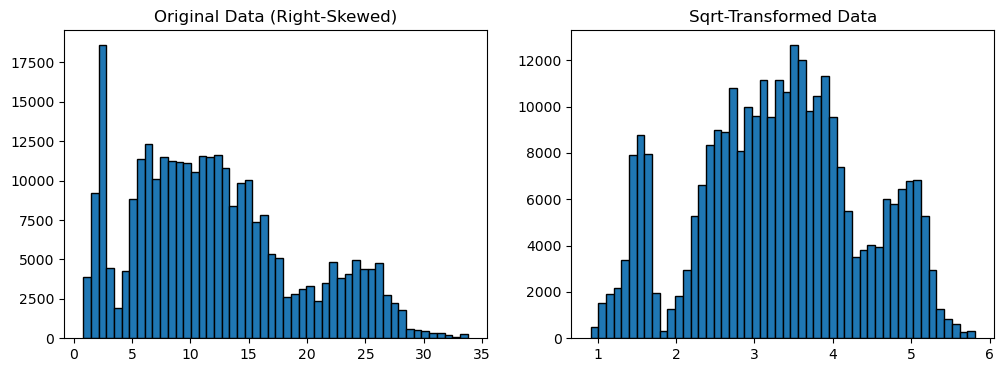

In [12]:
## log transforming the right skewed data: duration and price
import numpy as np
import matplotlib.pyplot as plt
sqrt_transformed_data = np.sqrt(df['duration'])
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['duration'], bins=50, edgecolor='black')
plt.title('Original Data (Right-Skewed)')

plt.subplot(1, 2, 2)
plt.hist(sqrt_transformed_data, bins=50, edgecolor='black')
plt.title('Sqrt-Transformed Data')
plt.show()
df['duration_sqrt'] = np.sqrt(df['duration'])

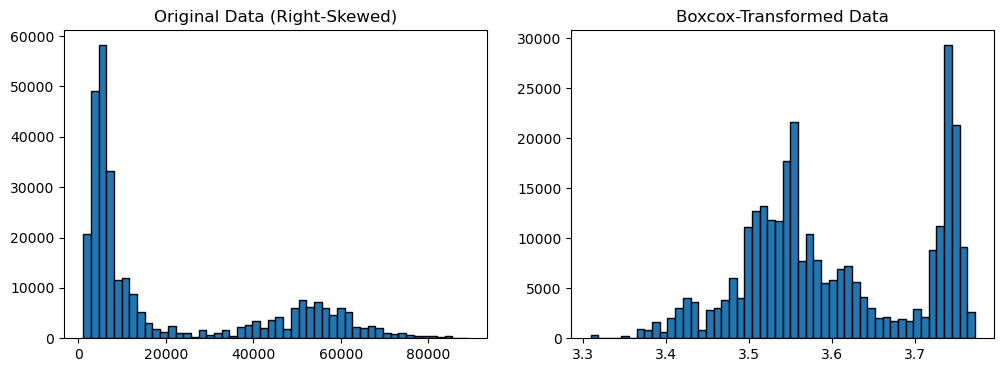

In [13]:
from scipy.stats import boxcox
boxcox_transformed_data, _ = boxcox(df['price'])
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=50, edgecolor='black')
plt.title('Original Data (Right-Skewed)')

plt.subplot(1, 2, 2)
plt.hist(boxcox_transformed_data, bins=50, edgecolor='black')
plt.title('Boxcox-Transformed Data')
plt.show()
df['price_boxcox'] = boxcox_transformed_data


In [14]:
from sklearn.preprocessing import StandardScaler
variables = ['duration_sqrt', 'price_boxcox']
x = df[variables]
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x, columns=[f'{col}_scaled' for col in variables])
df  = pd.concat([df, x], axis=1)
df = df.drop('duration_sqrt', axis = 1)
df = df.drop('price_boxcox', axis = 1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,duration_sqrt_scaled,price_boxcox_scaled
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0,-1.735912,-0.498010
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0,-1.685797,-0.498010
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0,-1.735912,-0.497464
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0,-1.710632,-0.497646
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0,-1.685797,-0.497646


In [15]:
df.dropna(inplace=True)
df['days_left'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49.])

In [16]:
bins = [0,7,14,21,28,35,42,50]
df['days_left_binned'] = pd.cut(df['days_left'], bins=bins, labels=False, right=False)

In [17]:
column_to_move = 'days_left_binned'
moved_column = df.pop(column_to_move)
df.insert(10, column_to_move, moved_column)
df = df.drop("duration", axis=1)
df = df.drop("days_left", axis=1)
df = df.drop("price", axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,duration_sqrt_scaled,price_boxcox_scaled
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,0,-1.735912,-0.498010
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0,-1.685797,-0.498010
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0,-1.735912,-0.497464
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0,-1.710632,-0.497646
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,0,-1.685797,-0.497646


In [18]:
#storing the data frame so that it can be used across all notebooks
%store df

Stored 'df' (DataFrame)


In [19]:
df.to_csv("C:/Users/Redmi/Desktop/IS460-G1-Machine Learning & Applications/IS460-main/IS460-main/data/df.csv")

In [20]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,duration_sqrt_scaled,price_boxcox_scaled
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,0,-1.735912,-0.498010
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0,-1.685797,-0.498010
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0,-1.735912,-0.497464
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0,-1.710632,-0.497646
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,0,-1.685797,-0.497646
...,...,...,...,...,...,...,...,...,...,...,...
298831,Vistara,UK-828,Chennai,Early_Morning,one,Night,Hyderabad,Business,3,-0.137069,1.493494
298832,Vistara,UK-824,Chennai,Night,one,Afternoon,Hyderabad,Business,3,-0.087181,1.555722
298833,Vistara,UK-826,Chennai,Afternoon,one,Early_Morning,Hyderabad,Business,3,0.373988,1.570295
298834,Vistara,UK-822,Chennai,Morning,one,Early_Morning,Hyderabad,Business,3,-0.148929,1.587833


In [7]:
# Load the preprocessed data
df = pd.read_csv("/Users/Redmi/Desktop/IS460-G1-Machine Learning & Applications/IS460-main/IS460-main/data/df_prepared.csv")

In [8]:
print(df.columns)

Index(['Unnamed: 0', 'airline', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'days_left_binned',
       'duration_sqrt', 'price'],
      dtype='object')


In [9]:
df

,Unnamed: 0,airline,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,duration_sqrt,price
0,0,-1.368800,-1.732372,0.198274,-2.491100,0.236474,0.370940,-0.674351,2.375914,-1.742522,5953.0
1,1,-1.368800,-1.732372,-0.298600,-2.491100,0.445839,0.370940,-0.674351,2.375914,-1.691940,5953.0
2,2,-1.562898,-1.732372,-0.298600,-2.491100,-2.002790,0.370940,-0.674351,2.375914,-1.742522,5956.0
3,3,0.885018,-1.732372,0.469739,-2.491100,-0.820969,0.370940,-0.674351,2.375914,-1.717006,5955.0
4,4,0.885018,-1.732372,0.469739,-2.491100,0.445839,0.370940,-0.674351,2.375914,-1.691940,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
295684,297916,0.885018,1.074924,0.469739,0.433789,0.753675,-0.305768,1.482907,-0.743546,-0.128743,55377.0
295685,297917,0.885018,1.074924,-1.671408,0.433789,0.236474,-0.305768,1.482907,-0.743546,-0.078388,55377.0
295686,297918,0.885018,1.074924,-0.298600,0.433789,0.236474,-0.305768,1.482907,-0.743546,0.387089,55377.0
295687,297919,0.885018,1.074924,-0.298600,0.433789,0.753675,-0.305768,1.482907,-0.743546,-0.140713,55377.0


### LightGBM

- Objective: Parameter specifies the objective function to be optimized during training. Since we performing regression, 'regression' is an appropriate choice.

- Metric: This parameter specifies the evaluation metric to be used during training. 'rmse' (Root Mean Squared Error) is a common choice for regression tasks.

- Num_leaves: This parameter controls the maximum number of leaves in each tree. Increasing num_leaves may improve the model's capacity to capture complex relationships in the data, but it also increases the risk of overfitting.

- Learning_rate: This parameter controls the step size at each iteration during gradient boosting. A lower learning rate typically results in a more stable training process but may require more iterations to converge.

- Feature_fraction: This parameter controls the fraction of features to be randomly sampled for each tree. It helps in reducing overfitting by introducing randomness into the model.

- Bagging_fraction and bagging_freq: These parameters control bagging (bootstrap aggregation), which is another technique to reduce overfitting. bagging_fraction specifies the fraction of data to be used for each iteration, while bagging_freq specifies the frequency of bagging.

- Verbose: This parameter controls the level of verbosity during training. Setting it to 0 suppresses all output, while higher values provide more information.

- Early_stopping_rounds: This parameter enables early stopping, which allows training to stop if the performance on the validation set does not improve for a certain number of rounds (specified by this parameter). It helps prevent overfitting and reduces training time.

These parameters provide a good starting point, but you may need to experiment with different values and potentially add more parameters to further optimize your model's performance on your specific dataset. Additionally, consider using techniques like cross-validation to fine-tune these parameters and assess the model's generalization performance.

### Importing Necessary Libraries

In [17]:
# Importing necessary libraries
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

### Load and Prepare Data for LightGBM

In [18]:
# Load the DataFrame
df = pd.read_csv("/Users/Redmi/Desktop/IS460-G1-Machine Learning & Applications/IS460-main/IS460-main/data/df_prepared.csv")

# Drop the unnecessary index column and the target column
X = df.drop(['Unnamed: 0', 'price'], axis=1)  # Adjust the target column name here
y = df['price']  # Adjust the target variable here

### Split Data into Training and Testing Sets

In [19]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Set LightGBM Parameters

In [20]:
# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 100,  # Change this value based on the best parameter
    'learning_rate': 0.1,  # Change this value based on the best parameter
    'feature_fraction': 1.0,  # Change this value based on the best parameter
    'bagging_fraction': 0.9,  # Change this value based on the best parameter
    'bagging_freq': 5,
    'early_stopping_rounds': 10,  # Number of rounds for early stopping
    'verbose': -1  # Suppress early stopping metric printing
}

### Train the LightGBM Model

In [21]:
print("Size of X_test:", X_test.shape)
print("Size of y_pred:", y_pred.shape)

Size of X_test: (59138, 9)
Size of y_pred: (88707,)


In [23]:
# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Train the model with early stopping
bst = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[train_data, test_data])

# Generate predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

### Make Predictions and Evaluate the Model
- Calculate Root Mean Squared Error (RMSE)
- Calculate R-squared Error
- Calculate Mean Absolute Percentage Error (MAPE)

In [24]:
# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)

# Maximum and minimum values of the target variable
max_price = y_test.max()
min_price = y_test.min()

# Normalize RMSE
normalized_rmse = rmse / (max_price - min_price)
print('Normalized RMSE:', normalized_rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true))

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error:', mape)

Root Mean Squared Error: 6989.0550333750725
Normalized RMSE: 0.057303306112974704
R-squared: 0.9045101020392872
Mean Absolute Percentage Error: 0.3366347652524351


Root Mean Squared Error (RMSE): This metric measures the average deviation of the predicted values from the actual values. In the case, the RMSE is approximately 6989.05. Lower RMSE values indicate better model performance, as they represent smaller deviations between predicted and actual values. However, the interpretation of RMSE depends on the scale of the target variable. For example, if we are predicting flight prices in dollars, an RMSE of 6989.05 means, on average, your model's predictions are off by approximately $6989.05.

R-squared (R²): This metric represents the proportion of the variance in the dependent variable (target variable) that is predictable from the independent variables (features) in the model. R-squared values range from 0 to 1, where 1 indicates a perfect fit and 0 indicates that the model does not explain any of the variability of the response data around its mean. In this case, the R-squared value is approximately 0.9045, indicating that the model explains around 90.45% of the variance in the target variable.

Mean Absolute Percentage Error (MAPE): This metric measures the average percentage difference between the predicted and actual values. In the case, the MAPE is approximately 0.3366, which means, on average, the model's predictions have an error of around 33.66% relative to the actual values. MAPE is useful for understanding the magnitude of errors in percentage terms, especially when dealing with data with different scales.

In summary, lower RMSE and MAPE values and higher R-squared values indicate better model performance. However, it's important to interpret these metrics in the context of your specific problem and the scale of your target variable.

Root Mean Squared Error: 6989.0550333750725
Normalized RMSE: 0.057303306112974704
R-squared: 0.9045101020392872
Mean Absolute Percentage Error: 0.3366347652524351


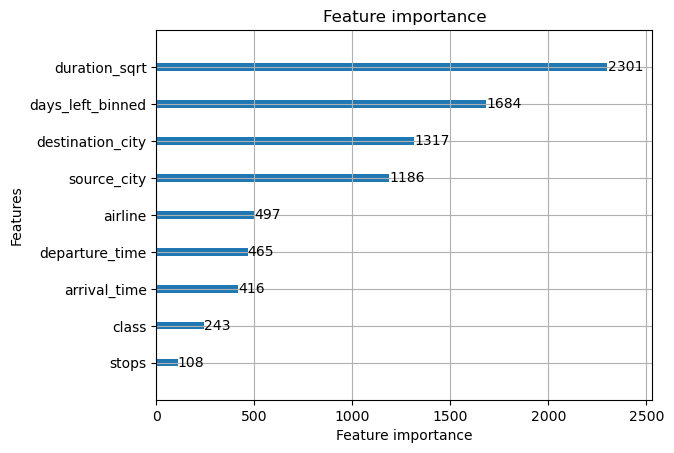

In [25]:
# Importing necessary libraries
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# Load the DataFrame
df = pd.read_csv("/Users/Redmi/Desktop/IS460-G1-Machine Learning & Applications/IS460-main/IS460-main/data/df_prepared.csv")

# Drop the unnecessary index column and the target column
X = df.drop(['Unnamed: 0', 'price'], axis=1)  # Adjust the target column name here
y = df['price']  # Adjust the target variable here

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set parameters for LightGBM
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'num_leaves': 100,  # Change this value based on the best parameter
    'learning_rate': 0.1,  # Change this value based on the best parameter
    'feature_fraction': 1.0,  # Change this value based on the best parameter
    'bagging_fraction': 0.9,  # Change this value based on the best parameter
    'bagging_freq': 5,
    'early_stopping_rounds': 10,  # Number of rounds for early stopping
    'verbose': -1  # Suppress early stopping metric printing
}

# Create LightGBM dataset
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Train the model with early stopping
bst = lgb.train(params, train_data, num_boost_round=1000, valid_sets=[train_data, test_data])

# Generate predictions
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)

# Maximum and minimum values of the target variable
max_price = y_test.max()
min_price = y_test.min()

# Normalize RMSE
normalized_rmse = rmse / (max_price - min_price)
print('Normalized RMSE:', normalized_rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true))

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error:', mape)

# Plot feature importance
lgb.plot_importance(bst, max_num_features=15) # Change max_num_features to display desired number of features
plt.show()

### Understanding Root Mean Squared Error (RMSE)
RMSE is a commonly used metric in regression tasks to evaluate the performance of predictive models. It provides a measure of how well the model's predictions match the actual target values. Let's break down what RMSE represents and how to interpret its value:

Root Mean Squared Error (RMSE): RMSE is a measure of the average magnitude of the errors between predicted and actual values in the units of the target variable. It's calculated as the square root of the mean of the squared differences between predicted and actual values.

Interpretation:
Lower RMSE: A lower RMSE value indicates better model performance. It means that, on average, the model's predictions are closer to the actual values.
Higher RMSE: Conversely, a higher RMSE value suggests poorer model performance. It means that, on average, the model's predictions are further away from the actual values.

Result:
The current RMSE value is 7205.25, it means that, on average, the model's predictions are approximately 7205.25 units (in the same scale as the target variable) away from the actual target values.

Evaluation:
Assess the RMSE value in the context of your specific problem and domain knowledge to determine whether the model's performance is satisfactory or requires further improvement.
In summary, RMSE provides a useful metric for evaluating the accuracy of regression models, with lower values indicating better performance. It's important to understand and interpret RMSE to assess the effectiveness of predictive models accurately.

#### To improve the RMSE for LightGBM model, we can use several strategies

- Hyperparameter Tuning: Use GridSearchCV to search for the best combination of hyperparameters.

- Feature Engineering: Create new features and transform existing ones to capture additional information from the data.

- Early Stopping: Implement early stopping to prevent overfitting and improve training efficiency.

### Hyperparameter tuning for LightGBM

Hyperparameter tuning for LightGBM involves finding the optimal values for various parameters that control the training process of the LightGBM model. These parameters can significantly affect the performance and generalization ability of the model. Here's a brief explanation of some key hyperparameters for LightGBM:

Learning Rate (or Shrinkage Rate): Learning rate controls the step size during the optimization process. A smaller learning rate can lead to slower convergence but may result in better performance by allowing the model to explore the parameter space more thoroughly.

Number of Leaves (num_leaves): This parameter determines the maximum number of leaves in each tree. Increasing the number of leaves can make the model more complex and potentially prone to overfitting, while decreasing it can lead to underfitting.

Maximum Depth (max_depth): Maximum depth specifies the maximum depth of each tree. Deeper trees can capture more complex patterns in the data but may also overfit. Limiting the depth can help control overfitting.

Minimum Child Samples (min_child_samples): This parameter specifies the minimum number of samples required to create a new split in a node. It can help prevent overfitting by ensuring that each split is based on a sufficient amount of data.

Subsample (subsample): Subsample controls the fraction of samples used for training each tree. It can be used to introduce randomness and reduce overfitting by training on a subset of the data.

Feature Fraction (colsample_bytree): This parameter specifies the fraction of features to consider when building each tree. It can be used to introduce additional randomness and reduce overfitting by training on a subset of features.

Hyperparameter tuning involves systematically searching through different combinations of these parameters to find the combination that results in the best model performance, typically measured using a validation metric like RMSE (Root Mean Squared Error) for regression tasks.

Grid search and random search are common techniques used for hyperparameter tuning. Grid search exhaustively searches through a predefined grid of hyperparameter values, while random search samples hyperparameter values randomly from a predefined range. Both methods evaluate the performance of each combination using cross-validation and select the best set of hyperparameters based on the validation metric.

### Perform hyperparameter tuning using Grid Search

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import numpy as np

# Load the preprocessed data
df = pd.read_csv("/Users/Redmi/Desktop/IS460-G1-Machine Learning & Applications/IS460-main/IS460-main/data/df_prepared.csv")

# Remove the 'Unnamed: 0' column
X = df.drop(columns=['Unnamed: 0', 'price'])
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'num_leaves': [20, 40, 60, 80, 100],
    'min_child_samples': [5, 10, 15],
    'max_depth': [-1, 5, 10, 20],
    'learning_rate': [0.05, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.03]
}

# Initialize LightGBM regressor
lgb_model = lgb.LGBMRegressor()

# Perform Grid Search
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and best RMSE score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print("Best Parameters:", best_params)
print("Best RMSE:", best_score)

# Predictions
y_pred = grid_search.predict(X_test)

# Calculate RMSE on test set
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error on Test Set:", test_rmse)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)

# Maximum and minimum values of the target variable
max_price = y_test.max()
min_price = y_test.min()

# Normalize RMSE
normalized_rmse = rmse / (max_price - min_price)
print('Normalized RMSE:', normalized_rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true))

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error:', mape)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001221 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001990 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] EN

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001226 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001418 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001395 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=80, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=80, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=100, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=100, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001861 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Inf

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=10, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=10, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001464 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=10, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=10, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=10, num_leaves=60, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001424 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=10, num_leaves=60, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001398 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=10, num_leaves=80, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001348 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=10, num_leaves=80, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001715 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=10, num_leaves=100, reg_alpha=0.01; total time=   0.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=10, num_leaves=100, reg_alpha=0.01; total time=   0.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightG

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=15, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002004 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=15, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=15, num_leaves=40, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=15, num_leaves=40, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001514 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=15, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001496 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=15, num_leaves=60, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001521 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001525 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=15, num_leaves=100, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001637 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=15, num_leaves=100, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightG

[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=40, reg_alpha=0; total time= 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001988 seconds.
You can set `force_row_wise=true`

[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001326 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.05,

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=80, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001552 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM]

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=100, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=100, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002006 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[CV] END learning_rate=0.05, max_depth=5, min_child_samples=10, num_leaves=20, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=10, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=10, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=10, num_leaves=40, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=10, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=10, num_leaves=60, reg_alpha=0.01; total t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=10, num_leaves=80, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=10, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_c

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=10, num_leaves=100, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the o

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=10, num_leaves=100, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001674 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=10, num_leaves=100, reg_alpha=0.03; total

[CV] END learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001735 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=20, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001606 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001508 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001737 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=80, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001568 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002025 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=100, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=100, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGB

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, num_leaves=20, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002014 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, num_leaves=20, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, num_leaves=40, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, num_leaves=40, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, num_leaves=60, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001366 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, num_leaves=80, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, num_leaves=80, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, num_leaves=100, reg_alpha=0.03; total time=   0.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001405 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, num_leaves=100, reg_alpha=0.03; total time=   0.6s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=10, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001909 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=10, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001225 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=10, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=10, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001406 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Inf

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=10, num_leaves=80, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=10, num_leaves=80, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Inf

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=10, num_leaves=100, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=10, num_leaves=100, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=15, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001429 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=15, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Inf

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=15, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001937 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=15, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=15, num_leaves=60, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=15, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001578 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=15, num_leaves=80, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=15, num_leaves=80, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001423 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightG

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=5, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=5, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=5, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001959 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=5, num_leaves=40, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001935 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=5, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001958 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=5, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=5, num_leaves=80, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=5, num_leaves=80, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001483 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=5, num_leaves=100, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=5, num_leaves=100, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001670 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=10, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=10, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=10, num_leaves=40, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001450 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=10, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=10, num_leaves=80, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002022 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=10, num_leaves=80, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001639 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Inf

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=10, num_leaves=100, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=10, num_leaves=100, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=15, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001379 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=15, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001712 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Inf

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=15, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=15, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001434 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Inf

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=15, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001425 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=15, num_leaves=60, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=15, num_leaves=80, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=15, num_leaves=80, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightG

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001335 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=5, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001556 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=5, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=5, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001998 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=5, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=5, num_leaves=80, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=5, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001704 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=5, num_leaves=100, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=5, num_leaves=100, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=10, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=10, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=10, num_leaves=40, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=10, num_leaves=40, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=10, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001691 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=10, num_leaves=80, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [In

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=10, num_leaves=100, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002077 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=10, num_leaves=100, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Inf

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=15, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001721 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=15, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=15, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001848 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=15, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001295 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=15, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001415 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=15, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001880 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=15, num_leaves=80, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001908 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=15, num_leaves=80, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [In

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001545 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001358 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Inf

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001400 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001409 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001768 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=80, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001236 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=80, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=100, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001657 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001605 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_

[CV] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002172 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001392 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[CV] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=40, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001442 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001416 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[CV] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001242 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[CV] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=80, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[CV] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001618 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001373 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[CV] END learning_rate=0.1, max_depth=5, min_child_samples=10, num_leaves=100, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001590 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[CV] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001230 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001684 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [I

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002035 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002150 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=80, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001566 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=80, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=80, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[CV] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=100, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=100, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002018 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=100, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001964 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=40, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] S

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001382 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001595 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] S

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=80, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=80, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001548 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] S

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=100, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001364 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=100, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002031 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [In

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001443 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001646 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=80, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001702 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=80, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=100, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=100, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=40, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=40, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001520 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001536 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001492 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=100, reg_alpha=0.03; total time=   0.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001651 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=100, reg_alpha=0.03; total time=   0.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001481 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002002 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001417 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] S

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=80, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=80, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] S

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=100, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001469 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=100, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001701 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001716 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002012 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=40, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001987 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [In

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001531 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=80, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001394 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=80, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001530 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=100, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001599 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=100, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001607 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001972 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=40, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001956 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=60, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001467 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=60, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001463 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001384 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=100, reg_alpha=0.03; total time=   0.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=15, num_leaves=100, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001650 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001404 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001401 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=5, num_leaves=40, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001436 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=5, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002033 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=5, num_leaves=80, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=5, num_leaves=80, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] S

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=5, num_leaves=100, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=5, num_leaves=100, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=10, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001630 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=10, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001783 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=10, num_leaves=40, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=10, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=10, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=10, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001625 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [In

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=10, num_leaves=80, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001950 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=10, num_leaves=80, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001461 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=10, num_leaves=100, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001318 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=10, num_leaves=100, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001465 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=15, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001652 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=15, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=15, num_leaves=40, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001452 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=15, num_leaves=40, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=15, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001198 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=15, num_leaves=60, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001910 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001247 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=15, num_leaves=100, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001697 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=15, num_leaves=100, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001503 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001600 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001598 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Inf

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=40, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=40, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001535 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No furth

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=60, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001549 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001653 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=60, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the o

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001686 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=100, reg_alpha=0.03; total 

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001593 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001982 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] S

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001655 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=40, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001447 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=40, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=60, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001855 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=60, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=60, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=80, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001622 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=10, num_leaves=100, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.3272

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=40, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001224 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002010 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=60, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=60, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001579 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=80, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001300 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=100, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furthe

[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001907 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001989 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=100, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001675 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=40, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001322 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=40, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001479 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=60, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001575 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001264 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=100, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001576 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [In

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=40, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=40, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001411 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001487 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001328 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=80, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001654 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=80, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=100, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001448 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=10, num_leaves=100, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001428 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Inf

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001930 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002063 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [In

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=40, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001393 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=40, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001588 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001239 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001468 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=80, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001678 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=80, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001509 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001272 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001945 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM

[CV] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002008 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001501 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=40, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=40, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001261 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001609 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001274 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=100, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001582 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.2, max_depth=20, min_child_samples=5, num_leaves=100, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002067 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [In

[CV] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=80, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=80, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001453 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=100, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001414 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.2, max_depth=20, min_child_samples=10, num_leaves=100, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001491 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Inf

[CV] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001475 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002213 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=40, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001376 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=40, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [In

[CV] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=60, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001624 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=80, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=80, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001474 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[CV] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.2, max_depth=20, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001522 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

C:\Users\Redmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 206982, number of used features: 9
[LightGBM] [Info] Start training from score 20672.999411
Best Parameters: {'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 15, 'num_leaves': 100, 'reg_alpha': 0}
Best RMSE: 7003.829490636005
Root Mean Squared Error on Test Set: 7038.530436952809

#### Results of Hyperparameter Tuning with LightGBM

Best Parameters:
#### Learning Rate: 0.1
A learning rate of 0.1 indicates that each step during training adjusts the model parameters by 10% of the gradient's value, helping to prevent overshooting the optimal solution.

#### Maximum Depth: Unlimited (-1)
An unlimited maximum depth allows the trees to grow until all leaves are pure, providing the model with more flexibility to capture complex relationships in the data.

#### Minimum Child Samples: 15
This parameter sets the minimum number of samples required to split an internal node. A higher value helps prevent overfitting by avoiding splits that result in nodes containing too few samples.

#### Number of Leaves: 100
The model will have 100 leaves in each tree. Increasing this value can make the model more expressive, potentially capturing finer-grained patterns in the data, but it also increases the risk of overfitting.

#### Regularization Alpha: 0
No regularization penalty is applied to the model's weights. Regularization helps prevent overfitting by penalizing large parameter values, but in this case, no penalty is used.

#### Best Root Mean Squared Error (RMSE):
Training Set: 7003.83
The RMSE on the training set indicates the average deviation of the predicted prices from the actual prices in the training data. A lower RMSE suggests that the model's predictions are closer to the actual prices, indicating better performance.

#### Root Mean Squared Error on Test Set:
Test Set: 7038.53
The RMSE on the test set measures the average deviation of the predicted prices from the actual prices in the unseen test data. This metric provides an estimate of the model's performance on new, unseen data.

#### Additional Metrics:
Normalized RMSE: 0.0577
Normalized RMSE scales the RMSE by the range of the target variable. It provides a standardized measure of prediction error relative to the variation in the target variable.

#### R-squared (Coefficient of Determination): 0.903
R-squared measures the proportion of variance in the target variable that is explained by the model. A higher R-squared value indicates that the model explains more of the variance in the target variable.

#### Mean Absolute Percentage Error (MAPE): 0.334
MAPE measures the average percentage deviation of the predicted prices from the actual prices. It provides insight into the magnitude of prediction errors relative to the actual prices.

#### Interpretation:
- The model achieved relatively good performance with an RMSE of approximately 7038.53 on the test set, indicating that, on average, the model's predictions deviate by around $7038.53 from the actual prices.
- The R-squared value of approximately 0.903 indicates that the model explains about 90.3% of the variance in the target variable, suggesting a good fit to the data.
- The MAPE of approximately 0.334 indicates that, on average, the model's predictions deviate by about 33.4% from the actual prices, which may be acceptable depending on the specific application.
- Overall, the model's performance is satisfactory, but further optimization and evaluation may be necessary depending on the specific requirements and context of the problem.

### Random Search for hyperparameter tuning

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import lightgbm as lgb
import numpy as np

# Load the preprocessed data
df = pd.read_csv("/Users/Redmi/Desktop/IS460-G1-Machine Learning & Applications/IS460-main/IS460-main/data/df_prepared.csv")

# Remove the 'Unnamed: 0' column
X = df.drop(columns=['Unnamed: 0', 'price'])
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_grid = {
    'num_leaves': [20, 40, 60, 80, 100],
    'min_child_samples': [5, 10, 15],
    'max_depth': [-1, 5, 10, 20],
    'learning_rate': [0.05, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.03]
}

# Initialize LightGBM regressor
lgb_model = lgb.LGBMRegressor()

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=lgb_model, param_distributions=param_grid, n_iter=100, cv=5, scoring='neg_root_mean_squared_error', random_state=42, verbose=2)
random_search.fit(X_train, y_train)

# Get the best parameters and best RMSE score
best_params = random_search.best_params_
best_score = -random_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_score)

# Predictions on the test set using the best model from RandomizedSearchCV
y_pred = random_search.predict(X_test)

# Calculate RMSE on test set
test_rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error on Test Set:", test_rmse)

# Calculate RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
print('Root Mean Squared Error:', rmse)

# Maximum and minimum values of the target variable
max_price = y_test.max()
min_price = y_test.min()

# Normalize RMSE
normalized_rmse = rmse / (max_price - min_price)
print('Normalized RMSE:', normalized_rmse)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print('R-squared:', r2)

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true))

mape = mean_absolute_percentage_error(y_test, y_pred)
print('Mean Absolute Percentage Error:', mape)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

[CV] END learning_rate=0.1, max_depth=5, min_child_samples=5, num_leaves=40, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001917 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001643 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001362 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=10, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001628 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=10, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001511 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=5, num_leaves=40, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001533 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

[CV] END learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002104 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Inf

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, num_leaves=80, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, num_leaves=80, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001602 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=5, num_leaves=80, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001387 seconds.
You can set `force_row_wise=true`

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=10, num_leaves=100, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001216 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.05, max_depth=20, min_child_samples=15, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001333 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM

[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001445 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.1, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001726 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] S

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001649 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001985 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=100, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=100, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001472 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=10, num_leaves=100, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001553 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No furth

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.1, max_depth=5, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001397 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001708 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20685.098837
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=60, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001422 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] S

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=60, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001266 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=15, num_leaves=20, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001753 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=15, num_leaves=20, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001623 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Inf

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=80, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=80, reg_alpha=0; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001390 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info]

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=5, num_leaves=100, reg_alpha=0.03; total time=   0.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001419 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furt

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002095 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=5, num_leaves=20, reg_alpha=0.01; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [I

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=10, num_leaves=80, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001454 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[LightGBM] [Warning] No fur

[CV] END learning_rate=0.2, max_depth=10, min_child_samples=5, num_leaves=80, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001485 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.2, max_depth=-1, min_child_samples=5, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001574 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [I

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=40, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of da

[CV] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=40, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001647 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20677.698211
[CV] END learning_rate=0.1, max_depth=20, min_child_samples=10, num_leaves=40, reg_alpha=0.03; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001504 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=10, num_leaves=60, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001378 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best ga

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=15, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=15, num_leaves=40, reg_alpha=0; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002001 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Inf

[CV] END learning_rate=0.05, max_depth=20, min_child_samples=15, num_leaves=100, reg_alpha=0; total time=   0.5s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001952 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=5, num_leaves=20, reg_alpha=0; total time=   0.2s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001893 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Inf

[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=10, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001383 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20652.327294
[CV] END learning_rate=0.05, max_depth=-1, min_child_samples=10, num_leaves=60, reg_alpha=0.01; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.05, max_depth=5, min_child_samples=15, num_leaves=100, reg_alpha=0.03; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001638 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGB

[CV] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001803 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165586, number of used features: 9
[LightGBM] [Info] Start training from score 20681.583141
[CV] END learning_rate=0.1, max_depth=10, min_child_samples=5, num_leaves=60, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [I

[CV] END learning_rate=0.05, max_depth=10, min_child_samples=15, num_leaves=80, reg_alpha=0.03; total time=   0.4s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001349 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 165585, number of used features: 9
[LightGBM] [Info] Start training from score 20668.289416
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[CV] END learning_rate=0.2, max_depth=5, min_child_samples=15, num_leaves=100, reg_alpha=0.01; total time=   0.3s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002319 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 206982, number of used features: 9
[LightGBM] [Info] Start training from score 20672.999411
Best Parameters: {'reg_alpha': 0, 'num_leaves': 100, 'min_child_samples': 15, 'max_depth': 20, 'learning_rate': 0.1}
Best RMSE: 7004.211558367038
Root Mean Squared Error on Test Set: 7041.345833350922
Root Mean Squared Error: 7041.345833350922
Normaliz

C:\Users\Redmi\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


[LightGBM] [Info] Total Bins 305
[LightGBM] [Info] Number of data points in the train set: 206982, number of used features: 9
[LightGBM] [Info] Start training from score 20672.999411
Best Parameters: {'reg_alpha': 0, 'num_leaves': 100, 'min_child_samples': 15, 'max_depth': 20, 'learning_rate': 0.1}
Best RMSE: 7004.211558367038
Root Mean Squared Error on Test Set: 7041.345833350922
Root Mean Squared Error: 7041.345833350922
Normalized RMSE: 0.05773203871038586
R-squared: 0.9031626076016126
Mean Absolute Percentage Error: 0.3345070349902675

The results indicate that the best hyperparameters for the LightGBM model, as determined by the RandomizedSearchCV, are as follows:

- Learning Rate: 0.1
- Max Depth: 20
- Minimum Child Samples: 15
- Number of Leaves: 100
- Regularization Alpha (reg_alpha): 0

The best Root Mean Squared Error (RMSE) achieved on the training data during cross-validation is approximately 7004.21. When applying this model to the test set, the RMSE obtained is around 7041.35. RMSE measures the average deviation of the predicted values from the actual values, with lower values indicating better performance.

The R-squared value of approximately 0.903 indicates that the model explains around 90.3% of the variance in the target variable. R-squared values range from 0 to 1, where higher values signify better model fit to the data.

The Normalized RMSE, which is the RMSE normalized by the range of the target variable, is approximately 0.0577. This metric provides a standardized measure of model performance relative to the scale of the target variable.

Finally, the Mean Absolute Percentage Error (MAPE) is approximately 0.3345, indicating that, on average, the model's predictions deviate by around 33.45% from the actual values. MAPE measures the accuracy of the model's predictions as a percentage of the actual values.


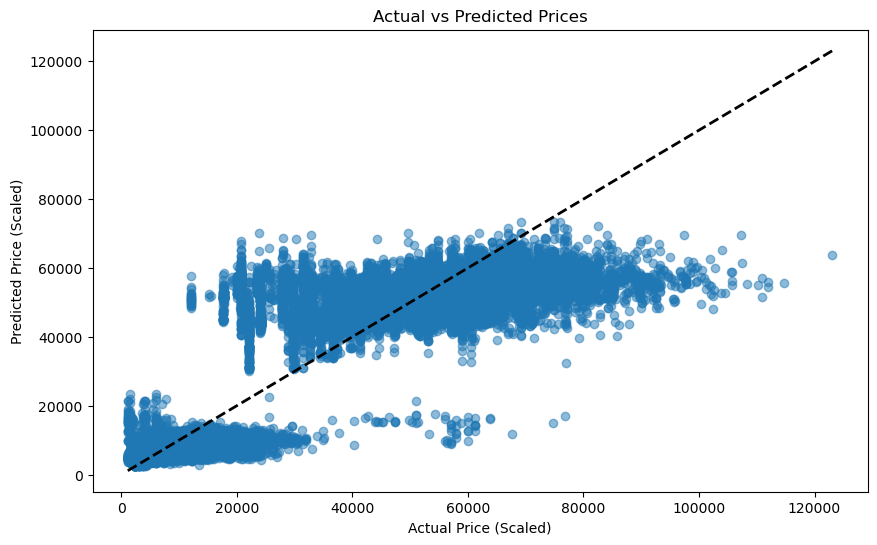

In [29]:
import matplotlib.pyplot as plt

# Plot actual vs predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Price (Scaled)')
plt.ylabel('Predicted Price (Scaled)')
plt.title('Actual vs Predicted Prices')
plt.show()

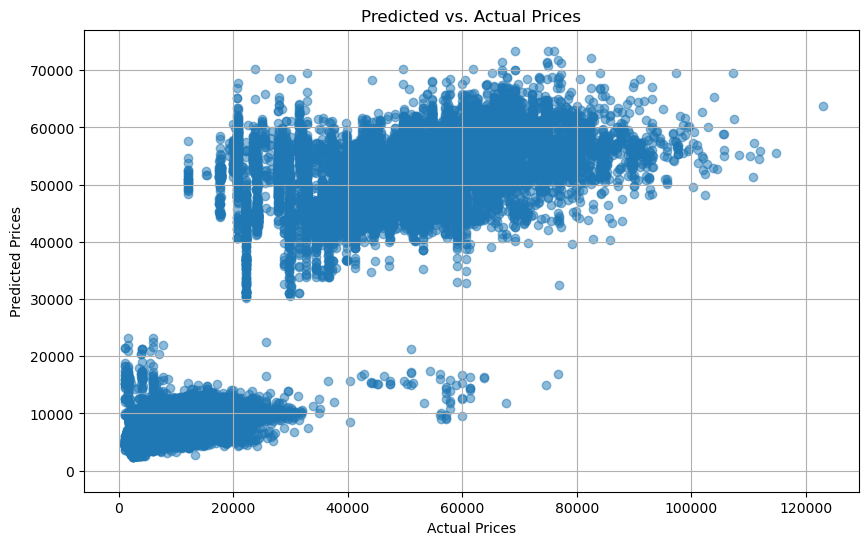

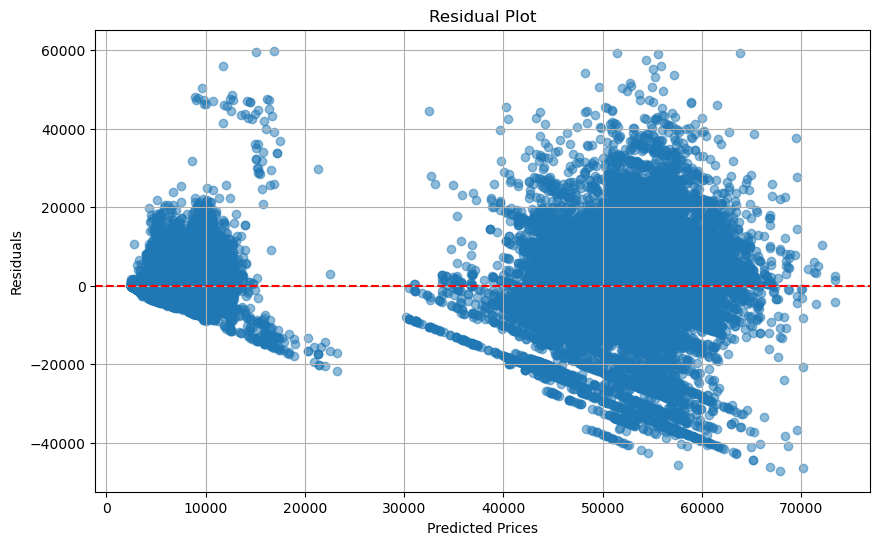

In [30]:
import matplotlib.pyplot as plt

# Scatter plot of predicted vs. actual prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([-2, 1], [-2, 1], color='red', linestyle='--')  # Plot diagonal line for reference
plt.title('Predicted vs. Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.grid(True)
plt.show()

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Plot horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

## Not Used Beyond Here

Hyperparameter Tuning:

a. We'll perform grid search to search the hyperparameter space efficiently.

b. Define a grid or parameter space to search over, including parameters like learning_rate, num_leaves, max_depth, min_child_samples, subsample, colsample_bytree, etc.

c. Use cross-validation to evaluate each set of hyperparameters and select the combination that minimizes RMSE.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [3, 5, 7],
    'min_child_samples': [10, 20, 30],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Initialize LightGBM regressor
lgb_reg = lgb.LGBMRegressor(objective='regression', metric='rmse', n_estimators=1000)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=lgb_reg, param_grid=param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and best RMSE score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print("Best Parameters:", best_params)
print("Best RMSE:", best_score)

Ensemble Learning:

a. We'll train multiple LightGBM models with different hyperparameters or random seeds.

b. Combine predictions from multiple models using techniques like averaging or weighted averaging.

In [ ]:
from sklearn.ensemble import VotingRegressor

# Define different LightGBM models with different hyperparameters
model_1 = lgb.LGBMRegressor(learning_rate=0.05, num_leaves=50, max_depth=5)
model_2 = lgb.LGBMRegressor(learning_rate=0.1, num_leaves=100, max_depth=7)
model_3 = lgb.LGBMRegressor(learning_rate=0.01, num_leaves=31, max_depth=3)

# Train each model
model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)
model_3.fit(X_train, y_train)

# Combine predictions from all models using averaging
y_pred_ensemble = (model_1.predict(X_test) + model_2.predict(X_test) + model_3.predict(X_test)) / 3
ensemble_rmse = mean_squared_error(y_test, y_pred_ensemble, squared=False)

print("Ensemble RMSE:", ensemble_rmse)

Cross-Validation:

a. We'll perform k-fold cross-validation to estimate the model's performance more accurately.

b. Split the data into k folds, train the model on k-1 folds, and validate on the remaining fold.

c. Average the RMSE across all folds to get a more robust estimate of model performance.

In [ ]:
from sklearn.model_selection import cross_val_score

# Initialize LightGBM regressor
lgb_reg = lgb.LGBMRegressor(objective='regression', metric='rmse', n_estimators=1000)

# Perform k-fold cross-validation
cv_scores = cross_val_score(lgb_reg, X, y, cv=5, scoring='neg_root_mean_squared_error')

# Calculate the average RMSE across all folds
avg_rmse = -cv_scores.mean()

print("Average RMSE (Cross-Validation):", avg_rmse)

## Cross-Validation

In [122]:
import lightgbm as lgb
from sklearn.model_selection import KFold
import numpy as np

# Define the number of folds for cross-validation
num_folds = 30
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Initialize an array to store cross-validation scores
cv_scores = []

# Perform cross-validation
for train_idx, val_idx in kf.split(X_train, y_train):
    # Split the data into training and validation sets
    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Create LightGBM datasets
    train_data_fold = lgb.Dataset(X_train_fold, label=y_train_fold)
    val_data_fold = lgb.Dataset(X_val_fold, label=y_val_fold)
    
    # Train the model
    bst_fold = lgb.train(params, train_data_fold, num_boost_round=num_round, valid_sets=[val_data_fold])
    
    # Predict on the validation set and calculate RMSE
    y_pred_val = bst_fold.predict(X_val_fold, num_iteration=bst_fold.best_iteration)
    rmse_fold = np.sqrt(mean_squared_error(y_val_fold, y_pred_val))
    
    # Store the RMSE score
    cv_scores.append(rmse_fold)

# Convert scores to numpy array
cv_scores = np.array(cv_scores)

# Calculate mean and standard deviation of cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

print("Cross-Validation RMSE: {:.4f} +/- {:.4f}".format(cv_mean, cv_std))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003564 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2562
[LightGBM] [Info] Number of data points in the train set: 230086, number of used features: 1152
[LightGBM] [Info] Start training from score -0.001135
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2536
[LightGBM] [Info] Number of data points in the train set: 230087, number of used features: 1139
[LightGBM] [Info] Start training from score -0.001032
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2548
[LightGBM] [Info] Number of data points in the train set: 230087, number of used features: 1145
[LightGBM] [Info] Start training from score -0.001228
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2544
[LightGBM] [Info] Number of data points in the train set: 230087, number of used features: 1143
[LightGBM] [Info] Start training from score -0.001216
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002772 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is n

##### Cross-Validation RMSE (Mean)
The average RMSE value across all folds of the cross-validation process. In this case, it indicates the average difference between the actual flight prices and the predicted prices made by the model. A lower RMSE value indicates better performance, as it means the model's predictions are closer to the actual prices on average.

##### Standard Deviation of Cross-Validation RMSE
The variability or spread of RMSE values across different folds of the cross-validation. A smaller standard deviation indicates that the RMSE values from different folds are closer to the mean, suggesting that the model's performance is consistent across different subsets of the data. In contrast, a larger standard deviation may indicate that the model's performance varies significantly depending on the subset of data used for training and validation.

Overall, a cross-validation RMSE of 0.3132 with a standard deviation of 0.0012 suggests that the model has good predictive performance and is consistent across different subsets of the data. However, it's essential to consider other factors such as the specific requirements of your application and whether the RMSE value meets your desired level of accuracy.

Auto-choosing row-wise multi-threading: LightGBM automatically chooses row-wise multi-threading to optimize performance. It mentions the overhead time spent on testing, which is negligible (0.002944 seconds). It suggests setting force_row_wise=true to remove this overhead if needed.

Total Bins: LightGBM indicates the total number of bins created for splitting features. Binning is a technique used to discretize continuous features into smaller intervals, which helps in building the decision trees.

Number of data points in the train set and number of used features: LightGBM shows the number of data points (rows) and the number of features (columns) used in the training set.

Start training from score: LightGBM starts training from a certain initial score, which is typically the mean or median of the target variable.

Root Mean Squared Error: Finally, LightGBM prints the Root Mean Squared Error (RMSE) calculated on the test set. This is the evaluation metric used to measure the performance of the trained model. In this case, the RMSE is approximately 0.31698. Lower values of RMSE indicate better model performance.

## Import Libraries

Import the necessary libraries

In [250]:
import lightgbm as lgb
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Load Data

Load dataset

In [251]:
# Load the DataFrame
df = pd.read_csv("C:/Users/Redmi/Desktop/IS460-G1-Machine Learning & Applications/IS460-main/IS460-main/data/df.csv")

In [252]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297527 entries, 0 to 297526
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            297527 non-null  int64  
 1   airline               297527 non-null  object 
 2   flight                297527 non-null  object 
 3   source_city           297527 non-null  object 
 4   departure_time        297527 non-null  object 
 5   stops                 297527 non-null  object 
 6   arrival_time          297527 non-null  object 
 7   destination_city      297527 non-null  object 
 8   class                 297527 non-null  object 
 9   days_left_binned      297527 non-null  int64  
 10  duration_sqrt_scaled  297527 non-null  float64
 11  price_boxcox_scaled   297527 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 27.2+ MB


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,days_left_binned,duration_sqrt_scaled,price_boxcox_scaled
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,0,-1.735912,-0.498010
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,0,-1.685797,-0.498010
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,0,-1.735912,-0.497464
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,0,-1.710632,-0.497646
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,0,-1.685797,-0.497646


## Prepare Data

In [253]:
# Define features (X) and target variable (y)

# Drop Unnamed: 0 index column
X = df.drop(['Unnamed: 0', 'class'], axis=1)
y = df['class']

# Convert categorical variables into dummy/indicator variables if needed
X = pd.get_dummies(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train the Model

In [254]:
# Initialize the LightGBM classifier
model = lgb.LGBMClassifier()

# Train the model
model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 164687, number of negative: 73334
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2847
[LightGBM] [Info] Number of data points in the train set: 238021, number of used features: 1168
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.691901 -> initscore=0.809022
[LightGBM] [Info] Start training from score 0.809022


LGBMClassifier()

## Evaluate the Model

In [255]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9997647296070984
Classification Report:
              precision    recall  f1-score   support

    Business       1.00      1.00      1.00     18186
     Economy       1.00      1.00      1.00     41320

    accuracy                           1.00     59506
   macro avg       1.00      1.00      1.00     59506
weighted avg       1.00      1.00      1.00     59506

Confusion Matrix:
[[18185     1]
 [   13 41307]]


## Classification Report

In [274]:
print(metrics.classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

    Business       1.00      1.00      1.00     18186
     Economy       1.00      1.00      1.00     41320

    accuracy                           1.00     59506
   macro avg       1.00      1.00      1.00     59506
weighted avg       1.00      1.00      1.00     59506



## Plotting Confusion Matrix

In [265]:
pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---- ----------------------------------- 1.2/10.6 MB 36.8 MB/s eta 0:00:01
   ---------- ----------------------------- 2.7/10.6 MB 42.7 MB/s eta 0:00:01
   ---------------- ----------------------- 4.5/10.6 MB 40.4 MB/s eta 0:00:01
   ---------------------- ----------------- 6.1/10.6 MB 42.8 MB/s eta 0:00:01
   ---------------------------- ----------- 7.5/10.6 MB 39.9 MB/s eta 0:00:01
   ---------------------------- ----------- 7.5/10.6 MB 39.9 MB/s eta 0:00:01
   ------------------------------- -------- 8.4/10.6 MB 31.5 MB/s eta 0:00:01
   ---------------------------------------  10.4/10.6 MB 34.4 MB/s eta 0:00:01
   ---------------------------------------- 10.6/10.6 MB 31.2 MB/s eta 0:00:00
  

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [266]:
import sklearn
print(sklearn.__version__)

1.3.0


[LightGBM] [Info] Number of positive: 164687, number of negative: 73334
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004873 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2847
[LightGBM] [Info] Number of data points in the train set: 238021, number of used features: 1168
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.691901 -> initscore=0.809022
[LightGBM] [Info] Start training from score 0.809022


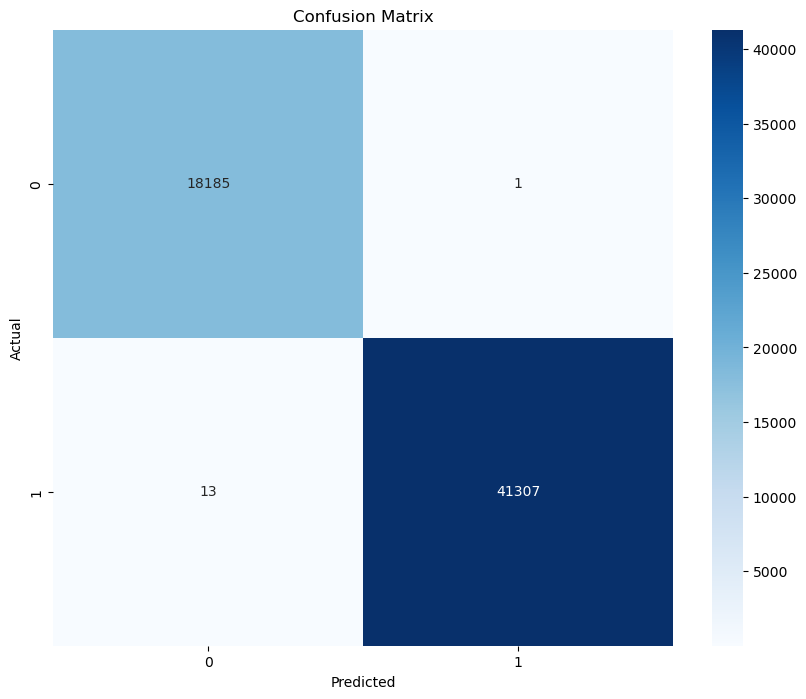

In [272]:
# Convert categorical variables into dummy/indicator variables
X = pd.get_dummies(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model with evaluation set
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], eval_metric='logloss')

# Get predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Plotting Feature Importance

<Figure size 100000x80000 with 0 Axes>

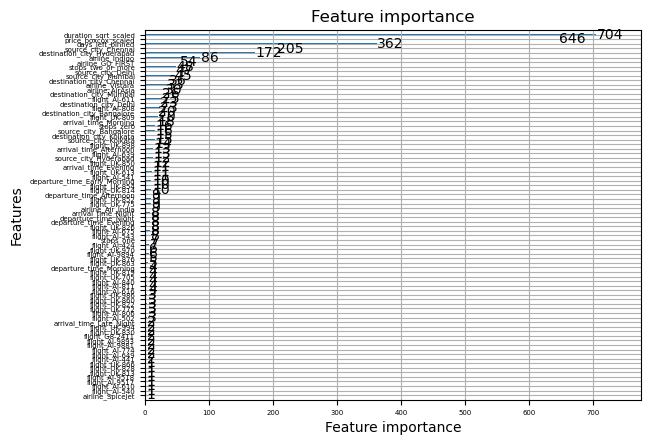

In [256]:
import matplotlib.pyplot as plt

plt.figure(figsize=(1000, 800))  # Adjust the figure size as needed

ax = lgb.plot_importance(model)
plt.xticks(fontsize=5)  # Adjust font size as needed
plt.yticks(fontsize=5)  # Adjust font size as needed
plt.show()

## Plotting Decision Trees

In [278]:
import graphviz

In [279]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


ImportError: You must install graphviz and restart your session to plot tree.

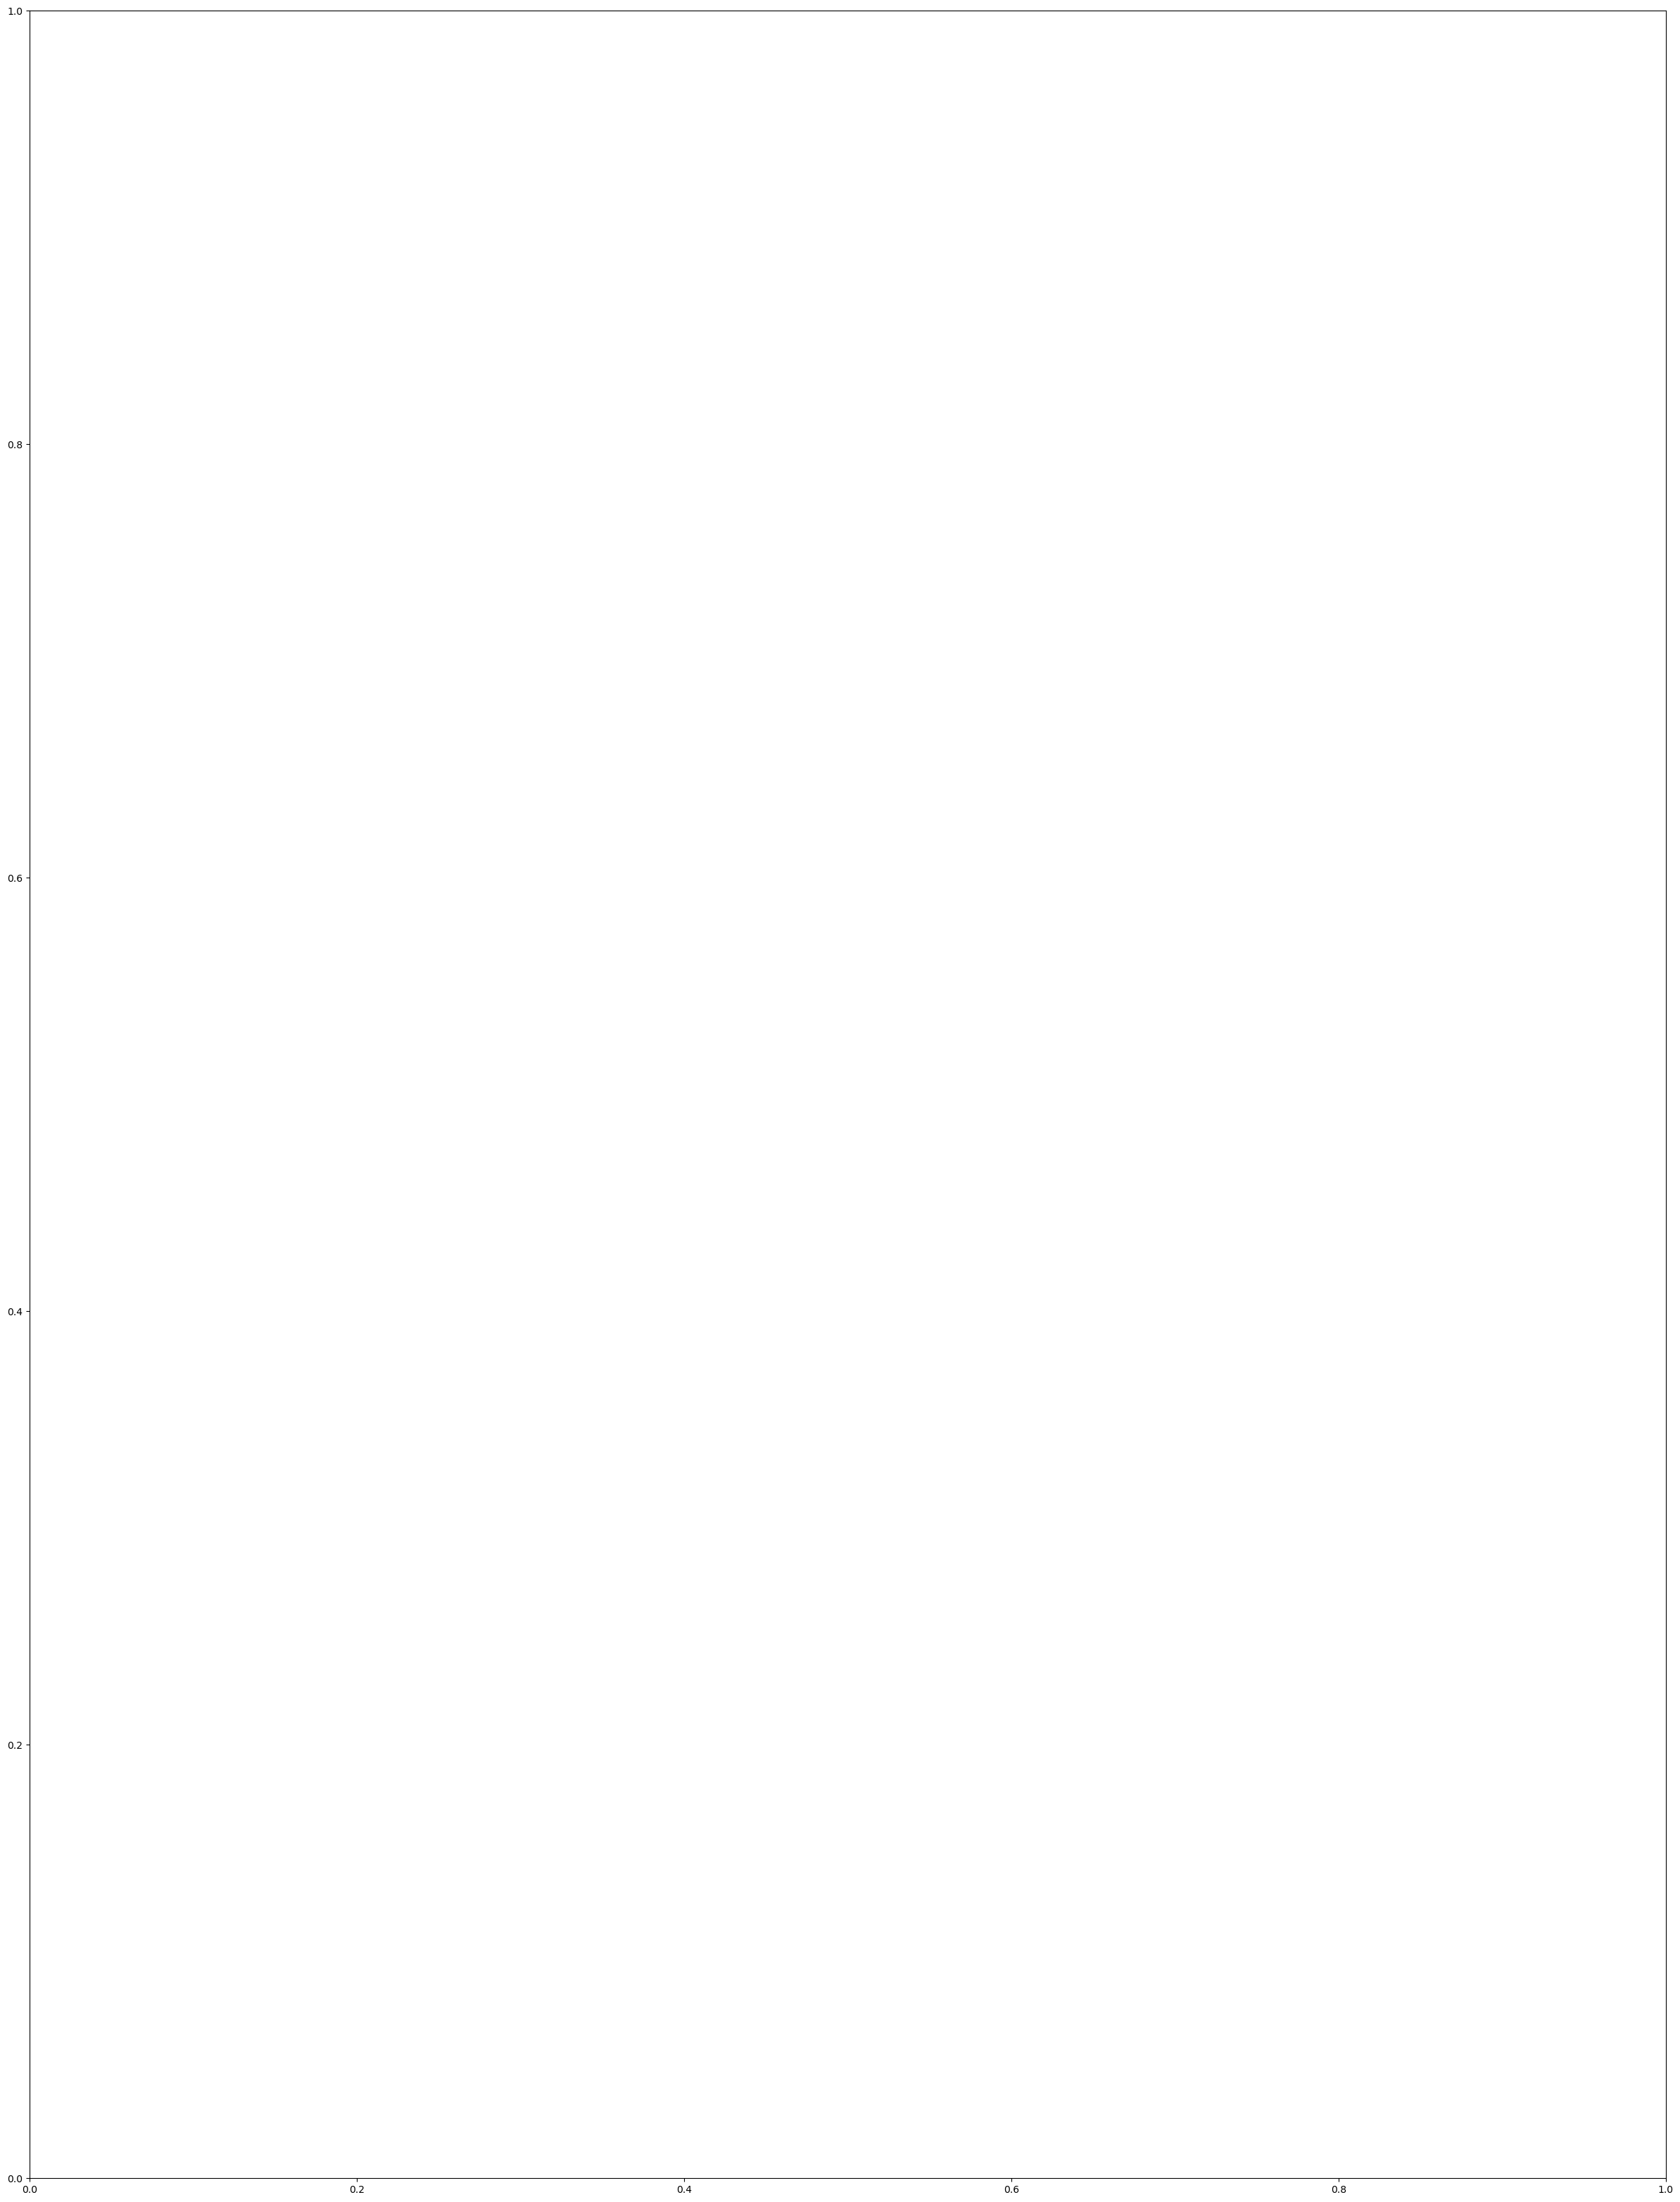

In [280]:
import os
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
os.environ["PATH"] += os.pathsep + 'c:/users/redmi/anaconda3/lib/site-packages'  
# Replace this with the path to Graphviz on laptop system

# Plot tree
lgb.plot_tree(model, figsize=(30, 40), show_info=['split_gain'])
plt.show()

## Plotting Metric Evaluation

In [27]:
lgb.plot_metric(model)

NameError: name 'model' is not defined